## Prosper Loan Data Exploration

## What variables affect the completion rate of loans

## Investigation Overview

In this investigation we will take a look at a couple of variables and see if they are related to the chance that a loan will be completed.
Dataset Overview

This document explores the 'Prosper Loan Data' dataset. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Rows with incomplete values were dropped.


In [62]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb

%matplotlib inline

### Gathering

In [63]:
loans = pd.read_csv('prosperLoanData.csv')

## Assess

## <span style="color: blue"> Visual Assessment</span>

In [64]:
loans.head(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.00,0.00,0.00,1.0000,0,0,0.0,1


## <span style="color: blue"> programmatic Assessment</span>

In [65]:
loans.shape

(113937, 81)

In [66]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [67]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [68]:
# check the columns names
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [69]:
# check the missing values
#pd.options.display.max_rows = 3000;
print(loans.shape)
loans.isnull().sum()

(113937, 81)


ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [70]:
# check if we have duplicated ListingKey
pd.options.display.max_columns = 81;
loans[loans.duplicated(subset = 'ListingKey',keep = False)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,0.10900,0.0399,0.06910,6.0,A,6.0,1,LA,Other,Employed,16.0,True,False,NaN,2013-12-17 09:18:36,740.0,759.0,1973-12-01 00:00:00,24.0,21.0,50.0,13,533.0,2.0,12.0,0.0,0.0,0.0,1.0,0.0,17451.0,0.34,24401.0,47.0,0.97,2.0,0.32,"$100,000+",True,10416.666667,A8B83704317372651543A02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127405,35000,2014-01-16 00:00:00,Q1 2014,BD9D3700316006874885EE9,1169.03,1157.1492,800.72,356.4292,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,0.25006,0.1475,0.10256,2.0,E,3.0,3,WA,Sales - Commission,Employed,108.0,False,False,NaN,2014-01-08 14:27:52,640.0,659.0,1998-10-09 00:00:00,3.0,3.0,24.0,3,162.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7177.0,0.63,4123.0,22.0,0.73,1.0,0.06,"$75,000-99,999",True,6250.000000,BBE63704110073042883EB9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126992,4000,2014-01-16 00:00:00,Q1 2014,A11F3694615686626190A12,166.54,166.5400,69.72,96.8200,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,0.13705,0.0549,0.08215,5.0,B,3.0,1,KY,Professiona

In [71]:
# check the number of duplicated ListingKey
len(loans[loans.duplicated(subset = 'ListingKey',keep = False)])

1698

In [72]:
# check if we have duplicated ListingNumber
loans[loans.duplicated(subset = 'ListingNumber',keep = False)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,0.10900,0.0399,0.06910,6.0,A,6.0,1,LA,Other,Employed,16.0,True,False,NaN,2013-12-17 09:18:36,740.0,759.0,1973-12-01 00:00:00,24.0,21.0,50.0,13,533.0,2.0,12.0,0.0,0.0,0.0,1.0,0.0,17451.0,0.34,24401.0,47.0,0.97,2.0,0.32,"$100,000+",True,10416.666667,A8B83704317372651543A02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127405,35000,2014-01-16 00:00:00,Q1 2014,BD9D3700316006874885EE9,1169.03,1157.1492,800.72,356.4292,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,0.25006,0.1475,0.10256,2.0,E,3.0,3,WA,Sales - Commission,Employed,108.0,False,False,NaN,2014-01-08 14:27:52,640.0,659.0,1998-10-09 00:00:00,3.0,3.0,24.0,3,162.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7177.0,0.63,4123.0,22.0,0.73,1.0,0.06,"$75,000-99,999",True,6250.000000,BBE63704110073042883EB9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126992,4000,2014-01-16 00:00:00,Q1 2014,A11F3694615686626190A12,166.54,166.5400,69.72,96.8200,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,0.13705,0.0549,0.08215,5.0,B,3.0,1,KY,Professiona

In [73]:
# check the number of duplicated ListingNumber
len(loans[loans.duplicated(subset = 'ListingNumber',keep = False)])

1698

#### we could notice that there are duplicated listingkeys and listingnumbers

In [74]:
loans['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [75]:
loans['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [76]:
loans['ProsperRating (numeric)'].unique()

array([nan,  6.,  3.,  5.,  2.,  4.,  7.,  1.])

In [77]:
loans['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [78]:
loans.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [79]:
# check the cancelled loans
loans.loc[loans.LoanStatus.isin(['Cancelled'])]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
332,093D3365430569291709120,8912,2006-04-26 22:23:10.147000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,True,False,NaN,2006-04-26 22:08:11.393000000,520.0,539.0,1997-11-21 00:00:00,NaN,NaN,18.0,0,0.0,12.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10361,Not displayed,False,0.000000,886633657959281284DF4BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,94,668,1000,2006-05-01 00:00:00,Q2 2006,4E95336440121524707AE42,39.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,6
59998,F77F33664545520971829DC,7646,2006-04-25 07:59:15.203000000,C,36,Cancelled,2006-05-31 00:00:00,0.14659,0.1395,0.1345,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Administrative Assistant,Not available,NaN,True,False,NaN,2006-04-25 07:56:42,640.0,659.0,1995-08-28 00:00:00,NaN,NaN,31.0,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21321,Not displayed,True,4166.666667,32773366339920232BFB8D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,94,766,2500,2006-05-08 00:00:00,Q2 2006,2932336610982263970437A,85.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,62
72480,09E1336627538645259AE42,908,2006-02-28 08:18:58.527000000,HR,36,Cancelled,2006-03-29 00:00:00,0.20735,0.2000,0.1950,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,CAC7336560237895229CE12,2006-02-16 11:41:07.423000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15248,Not displayed,True,3833.333333,493633654667845358BBA77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,96,125,3000,2006-03-06 00:00:00,Q1 2006,2CBF3366127093983629FE5,111.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23
97281,29453366240667435235AEE,11364,2006-05-05 03:16:59.510000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,NaN,NaN,NaN,NaN,NaN,NaN,0,NC,NaN,NaN,NaN,False,False,NaN,2006-05-05 03:00:35.130000000,500.0,519.0,1996-05-28 00:00:00,NaN,NaN,12.0,0,0.0,0.0,NaN,11.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01504,Not displayed,True,2600.000000,4630336434311592418390D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,94,889,1000,2006-05-15 00:00:00,Q2 2006,C9D53366460006104927C10,39.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,7
112975,E77E34330098056070F5C30,410006,2008-10-07 17:09:34.653000000,A,36,Cancelled,2008-10-16 00:00:00,0.16219,0.1075,0.0975,NaN,NaN,NaN,NaN,NaN,NaN,1,FL,Other,Full-time,30.0,False,False,NaN,2008-09-29 10:18:23.650000000,720.0,739.0,1993-04-01 00:00:00,9.

In [80]:
# check the number of the cancelled loans
len(loans.loc[loans.LoanStatus.isin(['Cancelled'])])

5

In [81]:
loans.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [82]:
loans.ProsperScore.unique()

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [83]:
# let's look at the definition of each column
loans_Definitions = pd.read_csv('Prosper Loan Data - Variable Definitions - Sheet1.csv')
pd.options.display.max_colwidth = 999
loans_Definitions

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the 'key' used in the listing object in the API."
1,ListingNumber,The number that uniquely identifies the listing to the public as displayed on the website.
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket."
6,ClosedDate,"Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) for the loan.
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.


In [84]:
# ListingCategory definition
loans_Definitions.loc[16,:]

Variable                                                                                                                                                                                                                                                                                                                                                                                                                                                           ListingCategory
Description    The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
Name: 16, dtype: object

In [85]:
#  ProsperRating (numeric) definition
loans_Definitions.loc[13,:]

Variable                                                                                                                                                               ProsperRating (numeric)
Description    The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
Name: 13, dtype: object

In [86]:
# ProsperRating (Alpha) definition
loans_Definitions.loc[14,:]

Variable                                                                                                                    ProsperRating (Alpha)
Description    The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
Name: 14, dtype: object

In [87]:
# LoanStatus definition
loans_Definitions.loc[5,:]

Variable                                                                                                                                                                                    LoanStatus
Description    The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
Name: 5, dtype: object

In [88]:
# ProsperScore definition
loans_Definitions.loc[15,:]

Variable                                                                                                                                                                               ProsperScore
Description    A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
Name: 15, dtype: object

In [89]:
# check the nuber of ProsberScore that contain 11 as value
len(loans.loc[loans.ProsperScore.isin([11])])

1456

## What is the structure of the dataset?

There are 113.937 loans in the dataset with 81 attributes each. Most of these are numeric. 

The ProsperRating variable is ordinal, it is sorted from worst to best.

**ProsperRating (alpha)**: N/A, HR, E, D, C, B, A, AA. (N/A is not part of the ordening).


The ListingCategory and EmploymentStatus are categorical variables.

**Listing Category**: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans. (it will be best change the numbers in the dataset to the corresponding strings. This will make created visuals more clear to read).

**EmploymentStatus**: Self-employed, Employed, Not available, Full-time, Other, nan, Not Employed, Part-time, Retired.

Because there are so many variables this exploration will focus on only 10-15 of them.


### What are the main features of interest in the dataset?

The main interest of this exploration is to discover which features are best used to predict if a loan will be completed.

### What features in the dataset do you think will help support your investigation into your features of interest?

There are several variables that probably have an effect on the completion rate of the loans.

    1.LoanStatus: this variable is needed to check the status of the loan.
    2.Recommendations: we can expect that the higher the amount of recommendations, the higher the chance that the loan will be completed.
    3. DebtToIncomeRatio: we can expect that a higher DebtToIncomeRatio will lead to a higher chance that a loan will not be completed.
    4. IncomeVerifiable: if this value is false, we can expect that the chance is lower that the loan wil be completed.
    5. StatedMonthlyIncome: we can expect that the higher this variable, the higher the chance that a loan will be completed.
    6. ProsperScore: we can expect that the higher this score, the higher the chance a loan will be completed.
    7. ProsperRating (alpha): we can expect that this variable will behave fairly analog to the ProsperScore.
    8. Term: the length of the loan expressed in months. It is to be expected that the higher this value, 
    the higher the chance a loan will be completed.
    9. BorrowerRate: we expect that the higher the rate is for the borrower, the higher the chance the loan will not be completed.
    10. Listing Category: the category of the listing that the borrower selected when posting their listing. 
    It is difficult to predict which effect this variable will have on the outcome of the loan.
    11. EmploymentStatus: the employment status of the borrower at the time they posted the listing.
    It will be interesting to see which statuses have a positive effect on the outcome of a loan.
    12. LoanOriginalAmount: the origination amount of the loan, we can expect this to be positively correlated with the StatedMonthlyIncome.
    This  means there probably won't be a correlation between loan amount and loans completed.
    

## <span style="color: red">Data Cleaning</span>
    1. Convert the numeric values in Listing Category to their corresponding string values.
    2. Convert ProsperRating (alpha) into an ordered categorical type.
    3. Drop certain categories from the LoanStatus column. We are only interested in the 'Completed', 'Defaulted', 'Chargedoff' values. 
    There are only 5 cancelled values, so these values will be dropped.
    4. There are 1456 values of 11 in the ProsperScore column, but the max should be 10.

In [90]:
# make a copy to the dataset before start cleaning
loans_clean = loans.copy()
loans_clean.shape

(113937, 81)

In [91]:
# drop the duplicated rows
#loans_clean.drop_duplicates(subset='ListingKey', keep="first",inplace = True)
#loans_clean.shape

In [92]:
# drop the 1456 rows that contain 11 in ProsperScore
loans_clean = (loans_clean.loc[~loans_clean.ProsperScore.isin([11])])
loans_clean.shape

(112481, 81)

In [93]:
loans_clean['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [94]:
# Define: use dictionary to convert int values to string values in the 'ListingCategory (numeric) column'.

# Code:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement',
             3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 
             7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 
             11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
             14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loans_clean['ListingCategory'] = loans_clean['ListingCategory (numeric)'].map(list_dict)
loans_clean.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

# Test:
loans_clean.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [95]:
# Define: use a dictionary to convert 'ProsperRating (alpha)' into an ordered categorical type.

# Code:
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'] }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_clean[var] = loans[var].astype(ordered_var)

loans_clean.rename(columns={'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

# Test:
loans_clean['ProsperRating'].unique()

[NaN, A, D, B, E, C, AA, HR]
Categories (7, object): [HR < E < D < C < B < A < AA]

In [96]:
# Define: drop all rows that don't contain a 'Completed', 'Defaulted', 'Chargedoff', in the LoanStatus column.

# Code:
loans_clean = loans_clean[loans_clean['LoanStatus'].str.contains('Completed|Defaulted|Chargedoff')]

# Test:
loans_clean.LoanStatus.value_counts()

Completed     38043
Chargedoff    11992
Defaulted      5017
Name: LoanStatus, dtype: int64

In [97]:
loans_clean.shape

(55052, 81)

In [98]:
loans_clean.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            26104
Term                                       0
LoanStatus                                 0
ClosedDate                                 0
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29079
EstimatedLoss                          29079
EstimatedReturn                        29079
ProsperRating (numeric)                29079
ProsperRating                          29079
ProsperScore                           29079
BorrowerState                           5512
Occupation                              2265
EmploymentStatus                        2252
EmploymentStatusDuration                7611
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey  

In [99]:
loans_clean.shape

(55052, 81)

In [100]:
# drop the missing values from BorrowerAPR column
loans_clean = loans_clean.dropna(subset=['BorrowerAPR'])
loans_clean.shape

(55027, 81)

In [101]:
# drop the columns tha contain missing values so we will just have the columns that we will need in our analyzing
# this code if we want to drop the columns that contain missing values
#loans_clean = loans_clean.dropna(axis='columns')

In [102]:
# check the shape that we have now
loans_clean.shape, loans.shape

((55027, 81), (113937, 81))

In [103]:
# check the missing values and our columns that left
loans_clean.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            26104
Term                                       0
LoanStatus                                 0
ClosedDate                                 0
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29054
EstimatedLoss                          29054
EstimatedReturn                        29054
ProsperRating (numeric)                29054
ProsperRating                          29054
ProsperScore                           29054
BorrowerState                           5487
Occupation                              2240
EmploymentStatus                        2227
EmploymentStatusDuration                7586
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey  

In [104]:
# make a copy to our cleaned DataFrame
df = loans_clean

## <span style= "color: green"> Univariate Exploration</span>

The exploration will start with examining the variable we are most interested in: Loan Status.

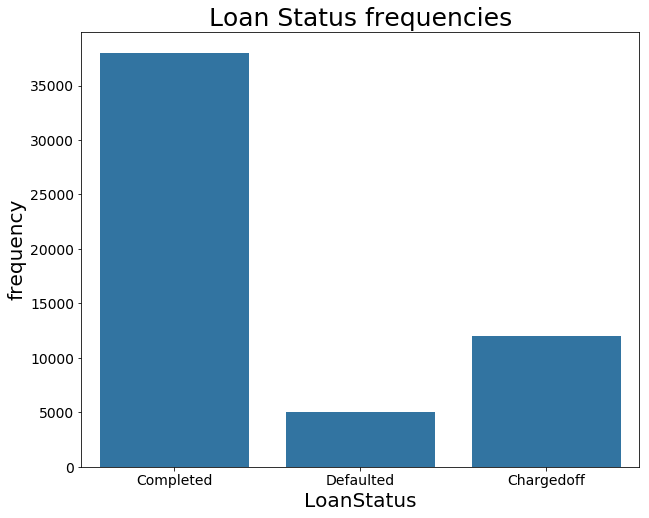

In [105]:
plt.figure(figsize=[10,8])
sb.countplot(data=df, x='LoanStatus', color=sb.color_palette()[0])
plt.title('Loan Status frequencies',fontsize = 25);
plt.tick_params(labelsize=14)
plt.ylabel('frequency',fontsize = 20)
plt.xlabel('LoanStatus',fontsize = 20);

In [106]:
df.LoanStatus.value_counts()

Completed     38018
Chargedoff    11992
Defaulted      5017
Name: LoanStatus, dtype: int64

As both Defaulted and Chargedoff are loans that have been failed to be payed back, we can combine these into a 'Failed' variable. This makes comparing completed and failed loans easier.

In [107]:
status_dict = {'Completed' : 'Completed', 'Defaulted' : 'Failed', 'Chargedoff' : 'Failed'}

df['LoanStatusM'] = df['LoanStatus'].map(status_dict)

df.LoanStatusM.value_counts()

Completed    38018
Failed       17009
Name: LoanStatusM, dtype: int64

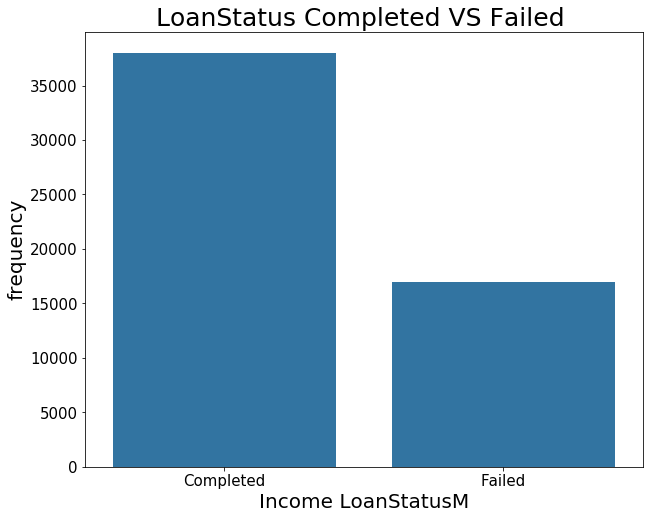

In [108]:
plt.figure(figsize=[10,8])
sb.countplot(data=df, x='LoanStatusM', color=sb.color_palette()[0]);
plt.title('LoanStatus Completed VS Failed ',fontsize = 25);
plt.tick_params(labelsize=15)
plt.ylabel('frequency',fontsize = 20)
plt.xlabel('Income LoanStatusM',fontsize = 20);

In [109]:
df.LoanStatusM.value_counts(normalize = True)

Completed    0.690897
Failed       0.309103
Name: LoanStatusM, dtype: float64

We can see that of all loans that are not currently still going, approximately a third fails. This seems very high.

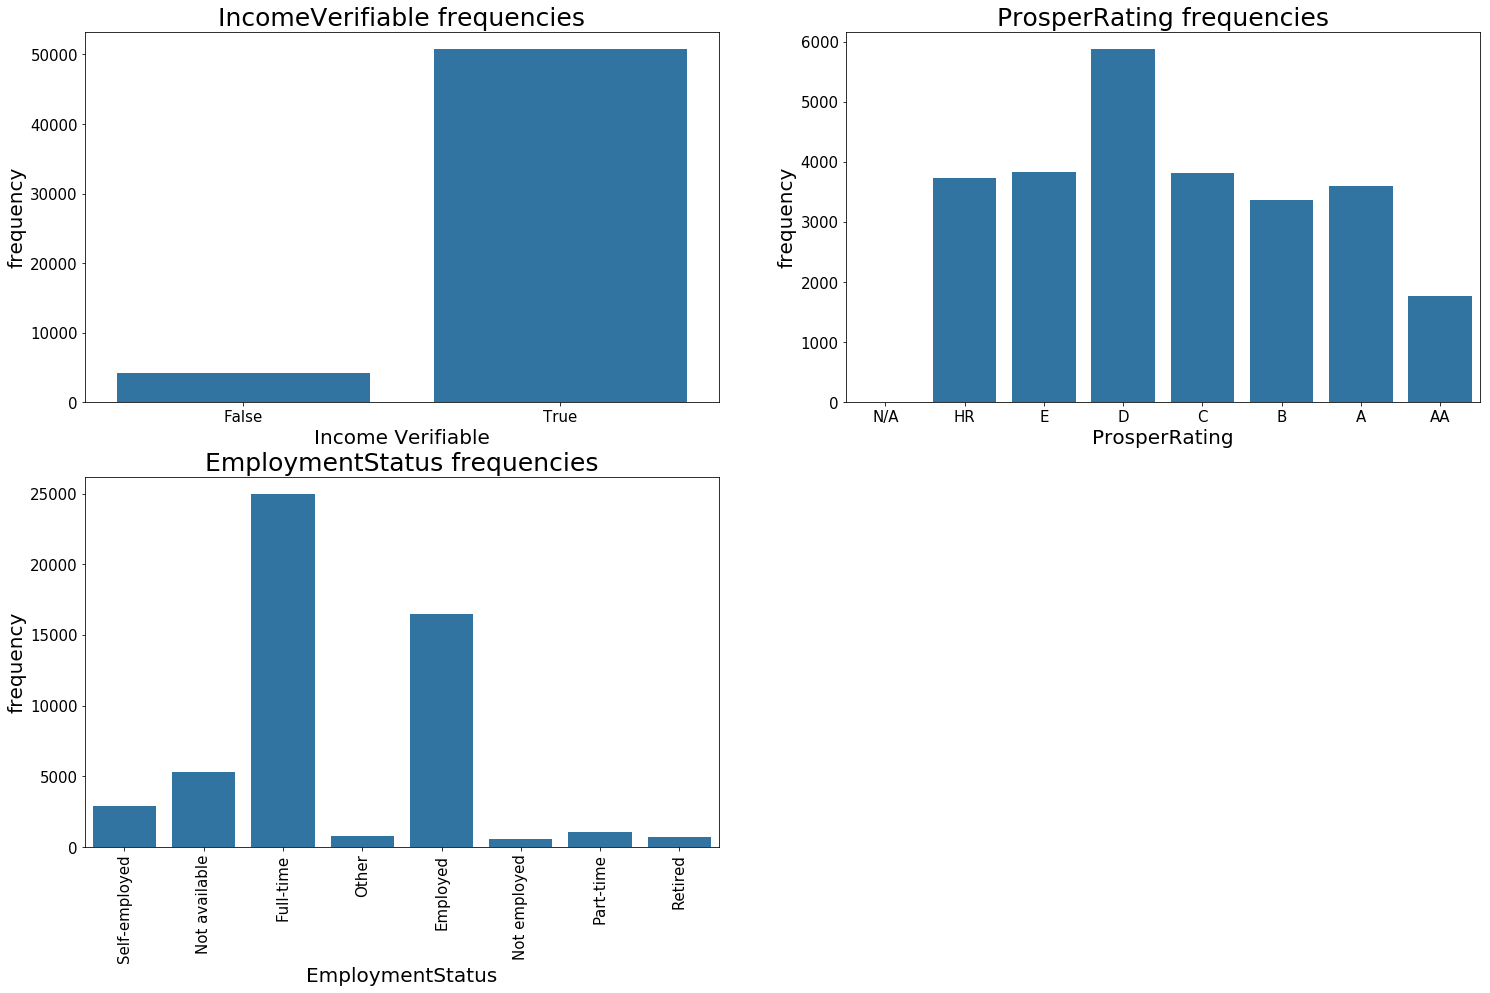

In [110]:
plt.figure(figsize=[25,15])
sb.countplot(data=df, x='IncomeVerifiable', color=sb.color_palette()[0]);


plt.subplot(2,2,1)
sb.countplot(data=df, x='IncomeVerifiable', color=sb.color_palette()[0]);
plt.title('IncomeVerifiable frequencies',fontsize = 25);
plt.tick_params(labelsize=15)
plt.ylabel('frequency',fontsize = 20)
plt.xlabel('Income Verifiable',fontsize = 20);

plt.subplot(2,2,2)
sb.countplot(data=df, x='ProsperRating', color=sb.color_palette()[0]);
plt.title('ProsperRating frequencies',fontsize = 25);
plt.tick_params(labelsize=15)
plt.ylabel('frequency',fontsize = 20)
plt.xlabel('ProsperRating',fontsize = 20);

plt.subplot(2,2,3)
sb.countplot(data=df, x='EmploymentStatus', color=sb.color_palette()[0]);
plt.title('EmploymentStatus frequencies',fontsize = 25);
plt.tick_params(labelsize=15)
plt.ylabel('frequency',fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.xlabel('EmploymentStatus',fontsize = 20);



When looking at the first graph it is clear that almost all incomes are verifiable. This is to be expected as it would seem unwise to loan money to someone who can't verify his income.

The prosper rating is slightly skewed to the right and unimodal. I would have expected the AA rating to be a lot more popular.

When looking at the third graph it is clear that most people are employed. This is also to be expected, as loaning out money to people who don't work does not seem wise.

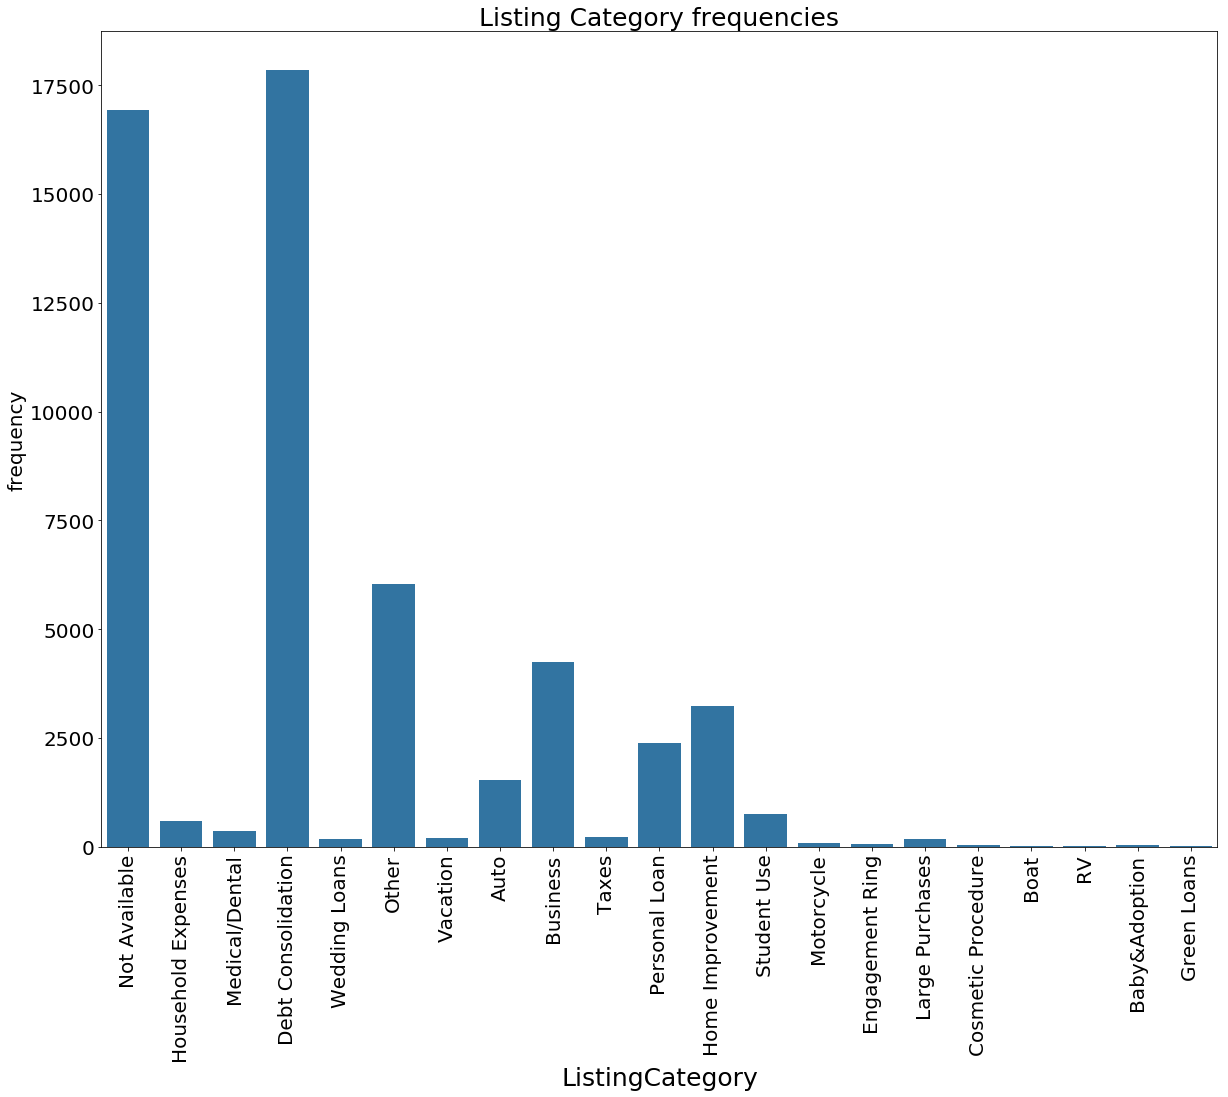

In [111]:
plt.figure(figsize=[20,15])
sb.countplot(data=df, x='ListingCategory', color=sb.color_palette()[0]);
plt.xticks(rotation = 'vertical');
plt.title('Listing Category frequencies',fontsize = 25);
plt.tick_params(labelsize=20)
plt.ylabel('frequency',fontsize = 20)
plt.xlabel('ListingCategory',fontsize = 25);

A lot of entries are missing, as there are a lot of 'Not available' values. The most popular reason to take a loan is 'Debt Consolidation'. All other reasons seem quite varied.

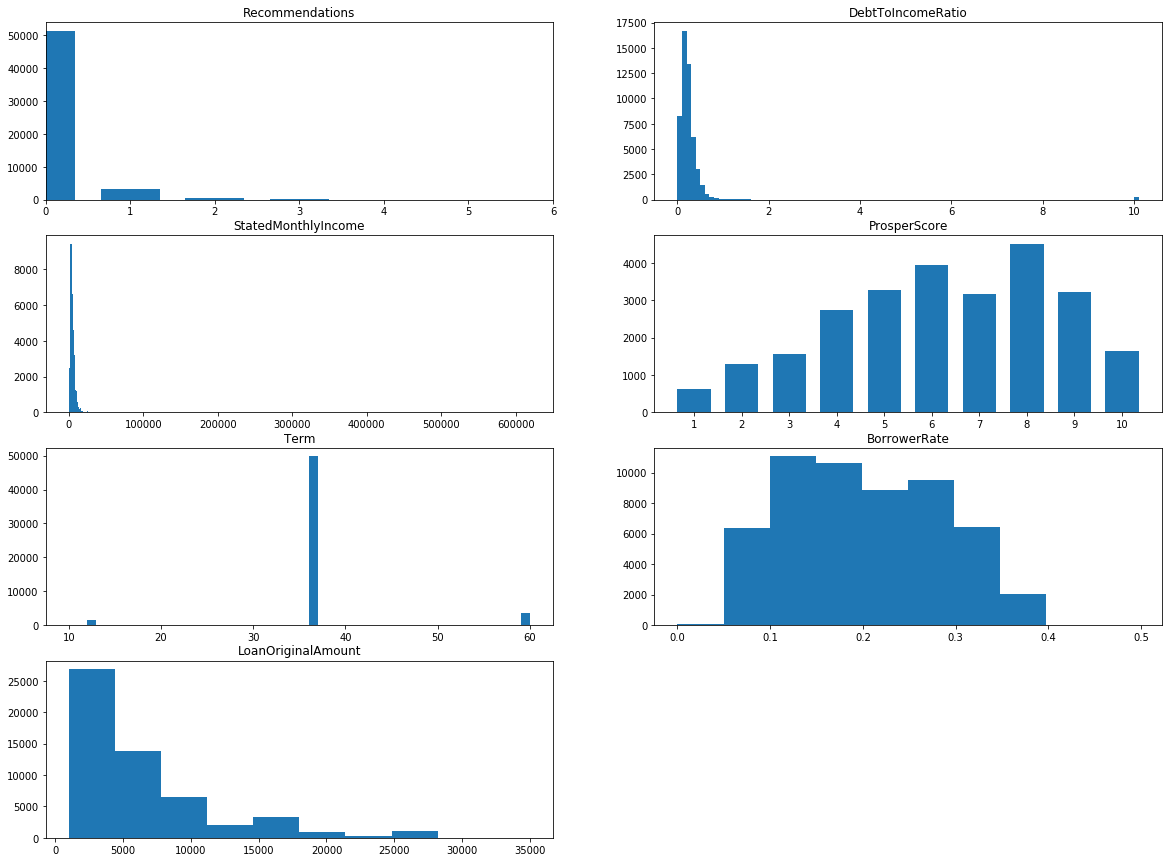

In [112]:
plt.figure(figsize=[20,15])

plt.subplot(4,2,1)
bins = np.arange(-2.5, df.Recommendations.max()+1.5, 1)
plt.hist(data=df, x='Recommendations', bins=bins, rwidth=0.7);
plt.xticks(np.arange(0,df.Recommendations.max()+1, 1))
plt.xlim((0,6));
plt.title('Recommendations')

plt.subplot(4,2,2)
bins = np.arange(0, df.DebtToIncomeRatio.max()+0.1, 0.1)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);
plt.title('DebtToIncomeRatio');

plt.subplot(4,2,3)
bins = np.arange(0, df.StatedMonthlyIncome.max()+1000, 1000)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins)
plt.title('StatedMonthlyIncome');

plt.subplot(4,2,4)
bins = np.arange(0.5,df.ProsperScore.max()+1.5,1)
plt.hist(data=df, x='ProsperScore', bins=bins, rwidth=0.7)
plt.xticks(np.arange(1, df.ProsperScore.max()+1, 1));
plt.title('ProsperScore');

plt.subplot(4,2,5)
bins = np.arange(10, df.Term.max()+1, 1)
plt.hist(data=df, x='Term', bins=bins);
plt.title('Term');

plt.subplot(4,2,6)
plt.hist(data=df, x='BorrowerRate');
plt.title('BorrowerRate');

plt.subplot(4,2,7)
plt.hist(data=df, x='LoanOriginalAmount');
plt.title('LoanOriginalAmount');

Recommendations: heavily skewed to the right, almost everyone has zero recommendations. Has a couple of outliers (hence the xlim).

DebToIncomeRatio: outliers at 10, needs further examining.

StatedMonthlyIncome: outliers, needs further examining.

ProsperScore: appears to be skewed to the left. Does not match the ProsperRating graph.

Term: there seem to be only 3 different terms: 12, 36, 60. Because of this, it might be better to see this variable as categoric instead of numeric.

BorrowerRate: seems to be skewed slightly to the right.

LoanOriginalAmount: this graph is heavily skewed to the right. There are no clear outliers and loans start quite low at $1000.

Let's take a closer look at DebtToIncomeRatio and StatedMonthlyIncome


In [113]:
df.DebtToIncomeRatio.describe()

count    50799.000000
mean         0.290030
std          0.737111
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

We can see that there are some clear outliers, it could be interesting to see how many loans get completed that have a DebtToIncomeRatio that is higher than 9.

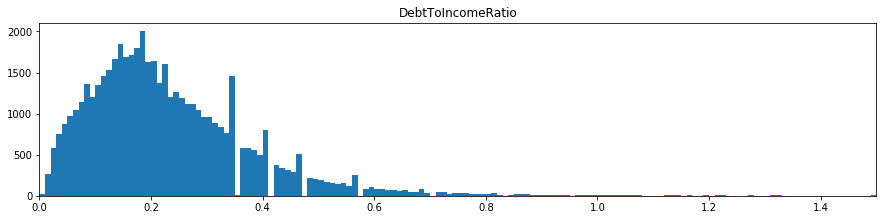

In [114]:
plt.figure(figsize=[15,7])
plt.subplot(2,1,1)
bins = np.arange(0, df.DebtToIncomeRatio.max()+0.01, 0.01)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);
plt.xlim((0,1.5))
plt.title('DebtToIncomeRatio');

When limiting the x-axis to 1.5, the graph seems to be skewed to the right. The peak is around 0.2. This comes close to the mean of 0.289928, and as the mean is sensitive of outliers a peak of 0.2 seems to be correct. The value of the mean is also 0.2, thus the peak in the graph correctly portrays this median.

In [115]:
df.StatedMonthlyIncome.describe()

count     55027.000000
mean       5050.415173
std        5709.724609
min           0.000000
25%        2805.041667
50%        4166.666667
75%        6250.000000
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

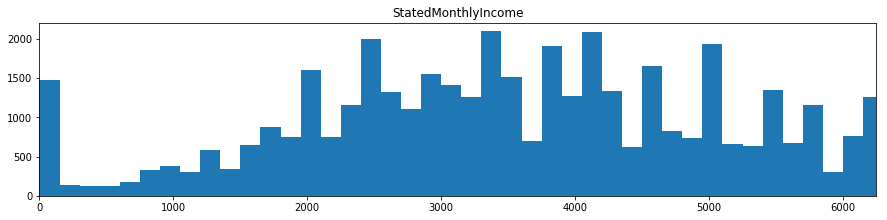

In [116]:
plt.figure(figsize=[15,7])
plt.subplot(2,1,2)
bins = np.arange(0, df.StatedMonthlyIncome.max()+150, 150)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins)
plt.xlim((0, 6250)) # cap at the 75 percentile
plt.title('StatedMonthlyIncome');



Except for some local minima and maxima and a peak at zero, the graph seems to be a very wide normal distribution. This can be seen more clearly in the second graph with bins of size 500. It even seems to be slightly skewed to the right.

Both graphs seem to be unimodal, although StatedMonthlyIncome has a peak at zero. This could be caused by loans that don't have a verified income.



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

When looking only at the values 'Completed', 'Chargedoff' and 'Cancelled' it is surprising to see that a third of all loans fail.

After ordening the ProsperRating variable, the bar chart had a normal distribution which was skweded slightly to the right. This was surprising as you would expect that less risky loans would be more popular.

The StatedMonthlyIncome variable will also be interesting to examine further, as it has a lot of outliers.

ListingCategory has a lot of 'Not Available' values, thus will probably not be used anymore in this analysis.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

All rows containg values other than 'Completed', 'Chargedoff' and 'Cancelled' in the LoanStatus column were dropped. Only these values will be needed for our analysis.

A LoanStatusM column was added, here the values 'Chargedoff' and 'Cancelled' were combined as the value 'Failed'. This makes it easier to compare completed and failed loans.


## <span style= 'color : green'> Bivariate Exploration </span>

The bivariate exploration will start with looking at pairwise correlations present between features in the dataset.

In [117]:
# The variables will be split into two categories: numeric and categoric. 
# Note that Term will be used as a categoric variable and that the ListingCategory will no longer be used.

numeric_vars = ['Recommendations', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperScore', 
               'BorrowerRate', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'LoanStatusM', 'IncomeVerifiable', 'ProsperRating', 'EmploymentStatus', 'Term']

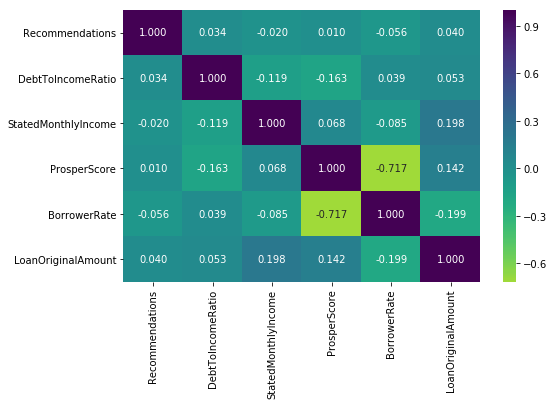

In [118]:
# Correlation_plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

In [119]:
# When trying to plot the plot matrix, some errors occurred because of nan values. 
# Define: all rows containing nan values in a numeric_var column will be dropped.

# Code:

df.dropna(subset=numeric_vars, inplace=True)

# Test:

for var in numeric_vars:
    print(df[var].isna().sum())

0
0
0
0
0
0


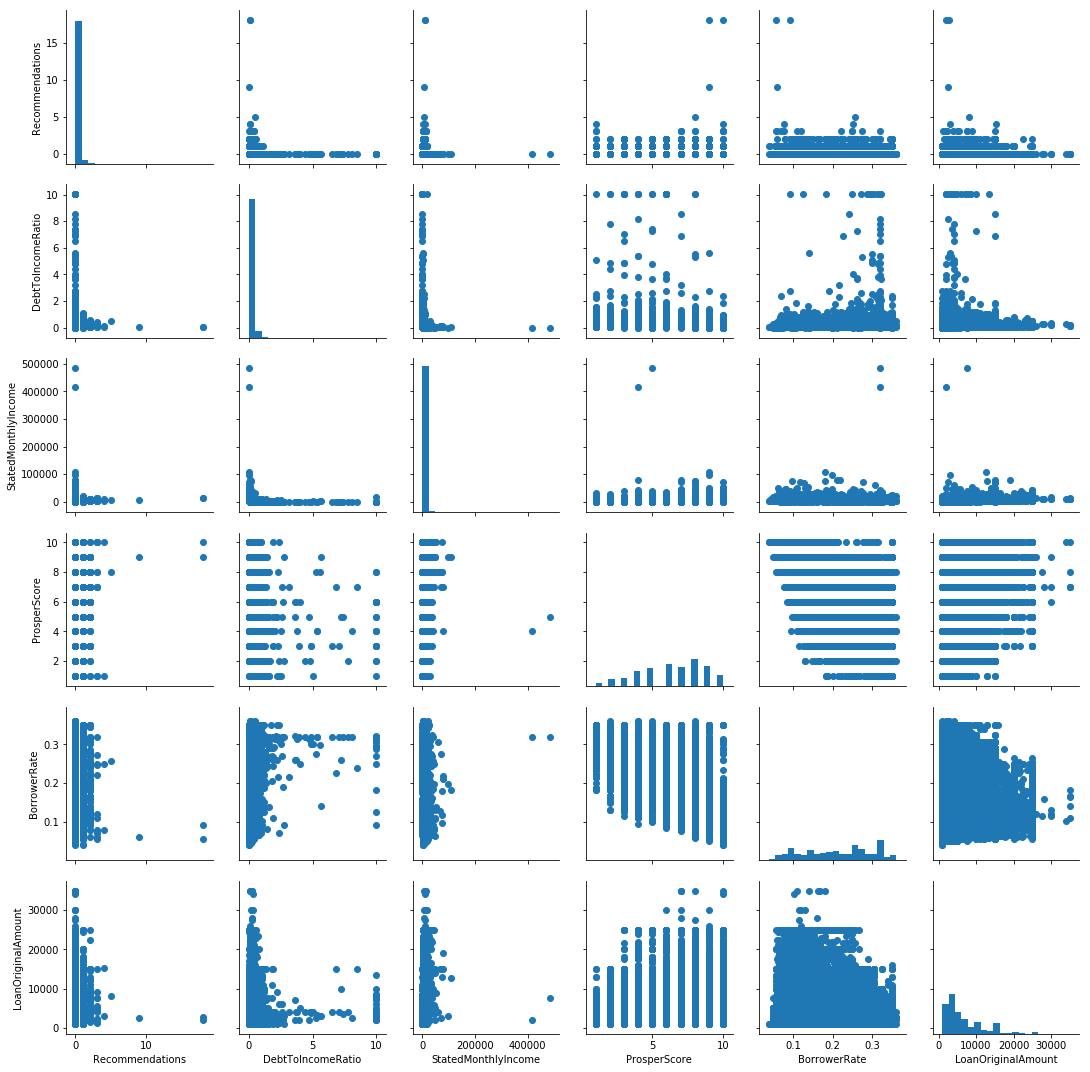

In [120]:
g = sb.PairGrid(data = df, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There are no clear correlations, outside of the StatedMonthlyIncome and the LoanOriginalAmount this isn't surprising. The main goal of this analyis is to try to see which variables correlate positively with completing a loan. This variable is categorical, so bar charts and boxplots might explain things better. When looking at the heatmap we can see a negative correlation between BorrowerRate and ProsperScore.

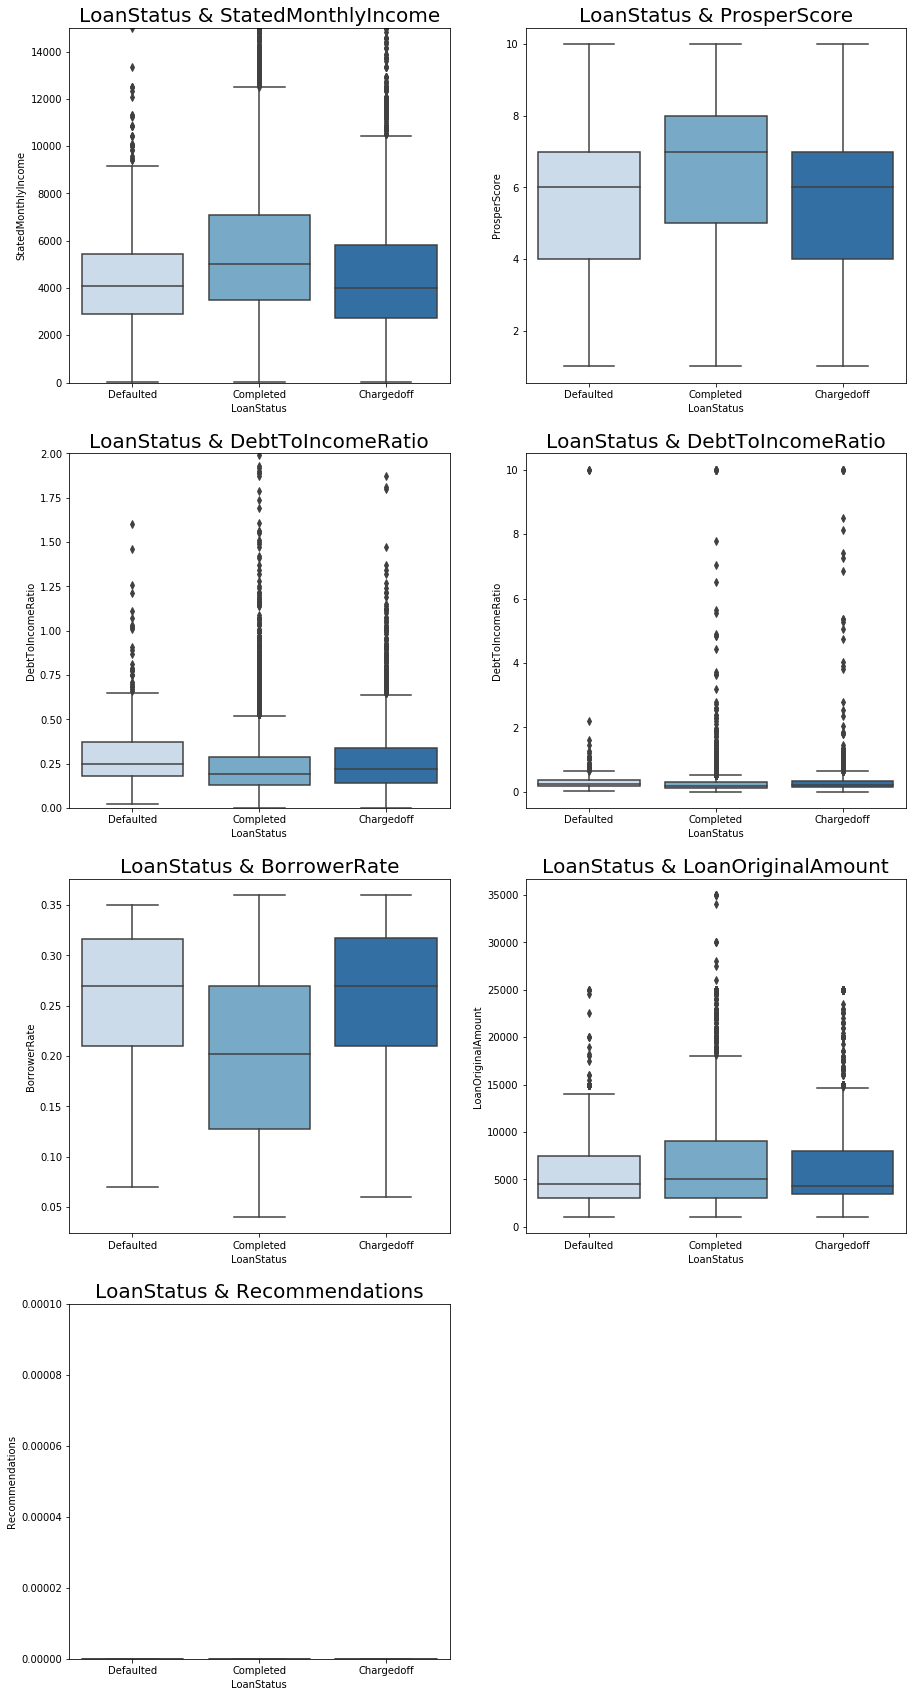

In [121]:
plt.figure(figsize = [15, 30])

plt.subplot(4, 2, 1)
sb.boxplot(data = df, x = 'LoanStatus', y = 'StatedMonthlyIncome', palette = 'Blues')
plt.ylim((0,15000))
plt.title('LoanStatus & StatedMonthlyIncome',fontsize = 20);

plt.subplot(4,2,2)
sb.boxplot(data = df, x = 'LoanStatus', y = 'ProsperScore', palette = 'Blues')
plt.title('LoanStatus & ProsperScore',fontsize = 20);

plt.subplot(4,2,3)
sb.boxplot(data = df, x = 'LoanStatus', y = 'DebtToIncomeRatio', palette = 'Blues')
plt.ylim((0,2))
plt.title('LoanStatus & DebtToIncomeRatio',fontsize = 20);

plt.subplot(4,2,4)
sb.boxplot(data = df, x = 'LoanStatus', y = 'DebtToIncomeRatio', palette = 'Blues')
plt.title('LoanStatus & DebtToIncomeRatio',fontsize = 20);

plt.subplot(4,2,5)
sb.boxplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', palette = 'Blues')
plt.title('LoanStatus & BorrowerRate',fontsize = 20);

plt.subplot(4,2,6)
sb.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', palette = 'Blues')
plt.title('LoanStatus & LoanOriginalAmount',fontsize = 20);

plt.subplot(4,2,7)
sb.boxplot(data = df, x = 'LoanStatus', y = 'Recommendations', palette = 'Blues')
plt.ylim((0,0.0001));
plt.title('LoanStatus & Recommendations',fontsize = 20);


There are multiple thing to note here.

StatedMonthlyIncome: the median of StatedMonthlyIncome of loans that are completed is higher than the loans that are cancelled or chargedoff. This confirms our expectations.

ProperScore: the median ProperScore is also higher for loans that are completed. Which again confirms earlier expectations.

DebtToIncomeRatio: 2 graphs were used, one with a y-limit and one without. While very close, the median and 75th percentile of DebtToIncomeRatio of completed loans are lower than those of defaulted or charged off loans. There are a lot of outliers though.

BorrowerRate: it is clear that completed loans have lower BorrowerRates.

LoanOriginalAmount: loans that are completed have a larger range of original amounts loaned. But the median of completed, defaulted and chargedoff are very similar.

Recommendations: almost all loans have 0 recommendations, if we wan't to further examine this variable it might be better to seperate the loans with zero recommendations and the ones with more than zero recommendations.


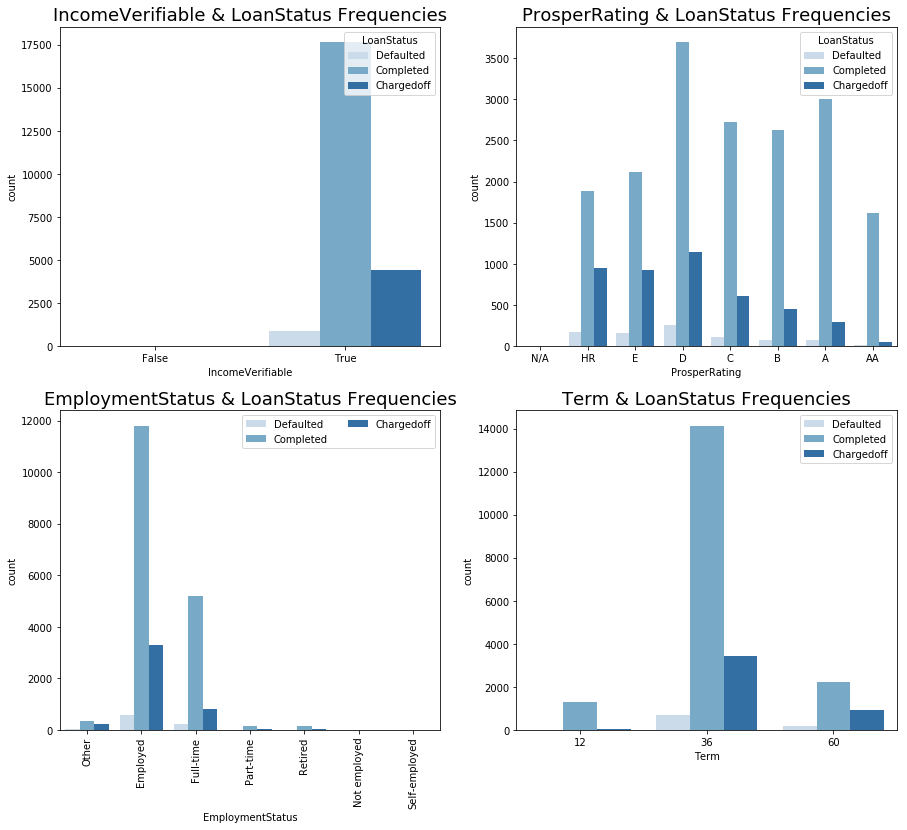

In [122]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [15, 20])

# subplot 1: IncomeVerifiable vs. LoanStatus
plt.subplot(3, 2, 1)
sb.countplot(data = df, x = 'IncomeVerifiable', hue = 'LoanStatus', palette = 'Blues')
plt.title('IncomeVerifiable & LoanStatus Frequencies',fontsize = 18);

# subplot 2: ProsperRating vs. LoanStatus
ax = plt.subplot(3, 2, 2)
sb.countplot(data = df, x = 'ProsperRating', hue = 'LoanStatus', palette = 'Blues')
plt.title('ProsperRating & LoanStatus Frequencies',fontsize = 18);

# subplot 3: EmploymentStatus vs. LoanStatus
ax = plt.subplot(3, 2, 3)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues')
plt.xticks(rotation = 'vertical')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title('EmploymentStatus & LoanStatus Frequencies',fontsize = 18);

# subplot 3: EmploymentStatus vs. LoanStatus
ax = plt.subplot(3, 2, 4)
sb.countplot(data = df, x = 'Term', hue = 'LoanStatus', palette = 'Blues')
ax.legend(loc = 1, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Term & LoanStatus Frequencies',fontsize = 18);

plt.show()



IncomeVerifiable: this are so few incomes that aren't verifiable that nothing new can be concluded out of this graph.

ProsperRating: AA rating has the lowest amount of chargedoff and defaulted loans, even relative to their amount of loans. The D rating has the highest amount of completed loans, which is probably caused by the fact that it is the most popular rating. Looking at this graph comparatively will give us a better insight.

EmploymentStatus: not much can be derived here, because the values of unemployment are so low.

Term: it is clear that the 36 term is the most popular and has the most absolute completed loans. We should investigate if this is also relatively the case.


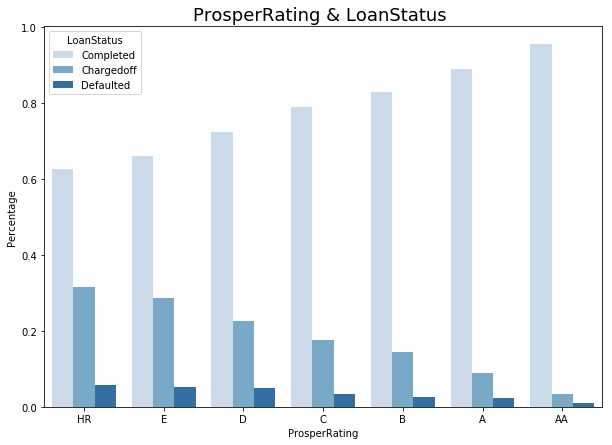

In [123]:
# For each rating, the percentage of completed, chargedoff and defaulted will be shown. Thus the total sum of each rating is 1.
ratings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
df_ProsperRating = pd.DataFrame()

plt.figure(figsize=[10,7])
for rating in ratings:
    temp = df[df['ProsperRating'] == rating]['LoanStatus'].value_counts(normalize=True).rename_axis('LoanStatus').reset_index(name='Percentage')
    temp['ProsperRating'] = rating
    frames = [df_ProsperRating, temp]
    df_ProsperRating = pd.concat(frames)

sb.barplot(x="ProsperRating", y="Percentage", hue="LoanStatus", data=df_ProsperRating, palette='Blues');
plt.title('ProsperRating & LoanStatus ',fontsize = 18);

We can see a clear trend, as the rating increases, the relative amount of completed loans increases and the amount of failed loans decreases

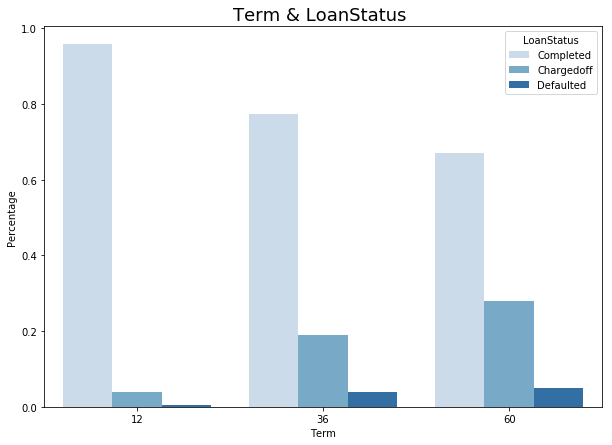

In [124]:
terms = [12, 36, 60]
df_Term = pd.DataFrame()

plt.figure(figsize=[10,7])
for term in terms:
    temp = df[df['Term'] == term]['LoanStatus'].value_counts(normalize=True).rename_axis('LoanStatus').reset_index(name='Percentage')
    temp['Term'] = term
    frames = [df_Term, temp]
    df_Term = pd.concat(frames)

sb.barplot(x="Term", y="Percentage", hue="LoanStatus", data=df_Term, palette='Blues');
plt.title('Term & LoanStatus ',fontsize = 18);

We can see that how higher the amount of terms, the higher the chance that a loan will not be completed.
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We have discovered a couple of variables that have a positive impact on the chance that a loan gets completed: StatedMonthlyIncome, ProsperScore and ProsperRating should all be as high as possible.

A couple of variables have a negative impact: BorrowerRate and Term length should be kept as low as possible.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No other interesting relationships have been found. It was surprising to learn that there is no correlation between StatedMonthlyIncome and LoanOriginalAmount.


## <span style='color:green'> Multivariate Exploration </span>

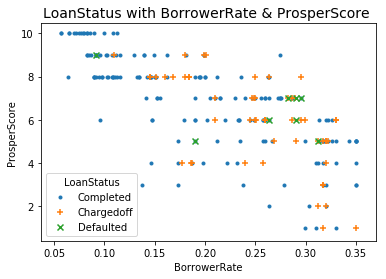

In [129]:
sample = df.sample(frac=0.01, replace=True)

markers = [['Completed', '.'], ['Chargedoff', '+'], ['Defaulted', 'x']]

for status, marker in markers:
    df_marked = sample[sample['LoanStatus'] == status]
    plt.scatter(data = df_marked, x = 'BorrowerRate', y = 'ProsperScore', marker = marker)
    plt.ylabel('ProsperScore')
    plt.xlabel('BorrowerRate')
plt.legend(['Completed','Chargedoff', 'Defaulted'],title ='LoanStatus' );
plt.title('LoanStatus with BorrowerRate & ProsperScore ',fontsize = 14);

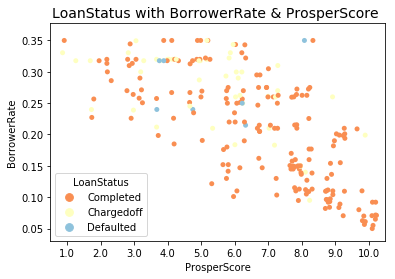

In [131]:
sb.stripplot(data = sample, y = 'BorrowerRate', x = 'ProsperScore', hue = 'LoanStatus', jitter = 0.35, palette = "RdYlBu");
plt.title('LoanStatus with BorrowerRate & ProsperScore ',fontsize = 14);



We can see that there are more blue points than orange plusses and green crosses in the upper left corner. The more we go to the lower right the more failed loans we encounter.
Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

No new relationships were observerd. Observations that were already made were confirmed by the multivariate plots.
Were there any interesting or surprising interactions between features?

Nohing new was found.
